<a href="https://colab.research.google.com/github/Brandao20vtr/Projetos/blob/main/ML01_PreProcessamentoCredito_PrevisaoSenso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [1]:
!pip install plotly --upgrade   # Faz atualização da biblioteca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px   # Biblioteca para gerar gráfico dinâmico

%matplotlib inline

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

# Exploração dos Dados

In [3]:
# Criando uma variável para poder importar o dataset

# /content/ --> É a pasta padrão do colab onde o arquivo foi carregado
base_credit = pd.read_csv('/content/credit_data.csv')

# 'index_col=0' --> Para tirar o índice que vem antes da primeira coluna

In [4]:
# Extraindo algumas informações do dataset
base_credit.info()

# Verificando se todos os tipos de dados estão corretos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [5]:
# Contando Linhas e Colunas
print('Linhas: ', base_credit.shape[0])
print('Colunas: ', base_credit.shape[1])

Linhas:  2000
Colunas:  5


# OBJETIVO 
Usar 'income'(renda), 'age'(idade), 'loan'(dívida) para fazer uma previssão futura e identificar se a pessoa vai pagar ou não o impréstimo.

In [6]:
# Mostrando os 5 últimos e os 5 primeiros indices do dataset
base_credit

# A ideia é fazer a previsão da útima coluna 'default' para 
# saber se a pessoa pagou ou não o crédito

############################################################################################

# 'clientid' --> Id do cliente. Variável do tipo Nominal, não existe uma ordenação nesses dados
# o cliente com id 6 não é melhor que o cliente com id 17, 
# nominal porque o id pode ser consigerado como o nome do cliente. Identifica os clientes
# sendo uma característica única.

# 'income' --> É a renda da pessoa. Variável Numéria e Contínua, 
# pois tem números após a vígula. Variáveis contínuas são números reais.

# 'age' --> Idade da pessoa. Variável Contínua. Idade normalmente é inteiro, 
# mas nesse caso possuem números após a vígula.

# 'loan' --> A dívida que a pessoa possuí. Variável Numérica e Contínua.

# 'default' --> 0 se o cliente pagou e 1 se não pagou.Variável Numérica e Discreta.

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]

In [7]:
# Trazendo os 5 primeiros registros
base_credit.head()   

# Dentro do '.head(values)' pode colocar a quantidade de linhas que deseja ver
# Se deixar sem nenhum valor retorna as 5 primeiras linhas, foi o que aconteceu

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1

In [8]:
# Trazendo os 5 últimos registros
base_credit.tail()

# Mesmo caso do '.head(values)', pode retornar a quantidade de valores que desejar

clientid        income        age         loan  default
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

In [9]:
# Trazendo valores estatísticos do dataset
# Analisando um pouco
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [10]:
# Aplicndo um filtro para trazer quem mais o salário mais alto
base_credit[base_credit['income'] >= 69995.685578]

# 'base_credit[base_credit['income'] == 69995.685578]' --> Aplicando sinal de igual,
# não retornou nenhum valor porque provavelmente o valor poderia ter sido arredondado,
# então utilizamos '>=' para trazer o valor mais exato.

# Identificamos que com isso o cliente 423 é quem tem o salário mais alto.

clientid        income        age         loan  default
422       423  69995.685578  52.719673  2084.370861        0

In [11]:
# Aplicando filtro para trazer quem tem a menor dívida
base_credit[base_credit['loan'] <= 1.377630] 

# Identificamos que o cliente 866 é quem tem a menor dívida

clientid        income        age     loan  default
865       866  28072.604355  54.142548  1.37763        0

# Visualização dos Dados

In [12]:
# Contando quantos registros possuem em cada classe
np.unique(base_credit['default'], return_counts=True)

# Identificamos 1717 clientes que pagam os impréstimos e 283 que não pagam
# Observamos que é uma base de dados bem desbalanceada

(array([0, 1]), array([1717,  283]))

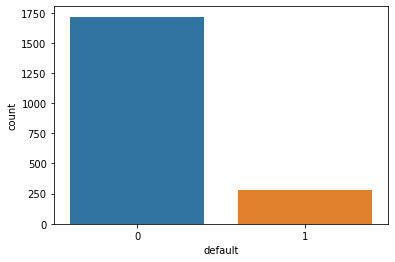

In [13]:
# Mostrando o resultado acima no gráfico
# Conta quantos registro possui em cada classe em grágico
sns.countplot(x = base_credit['default']);   # (;) para tirar o texto que aparece em cima do gráfico

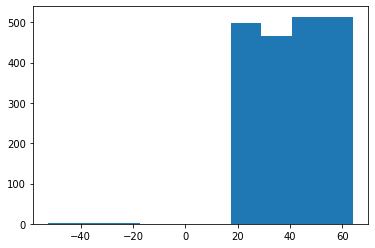

In [14]:
# Gerando um Histograma
plt.hist(x = base_credit['age']);   # Esse (;) no final é para não mostrar parte escrita em cima do gráfico

# No gráfico consta algumas idades negativas, por isso precisamos tratar esses dados
# usar dessa forma fica desbalanceado

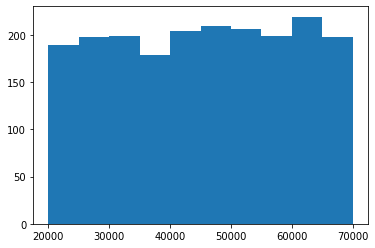

In [15]:
# Histograma da coluna 'income'(renda)
plt.hist(x = base_credit['income']);

# Importante para analizar os intervalos de salários

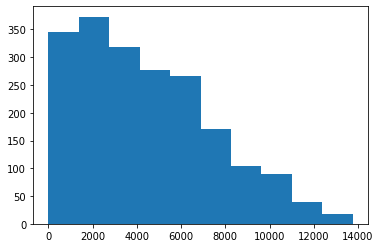

In [16]:
# Histograma da coluna 'loan'(dívida)
plt.hist(x = base_credit['loan']);

# Conseguimos ver que mais de 350 clientes possuem uma dívida entre R$ 2000 a R$ 3000 mil
# reais, e menos de 50 clientes possuem uma dívida de R$ 14000 mil reais.

In [17]:
# Criando uma variável para gerar um gráfico dinâmico
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico.show()

# Esses valores estão fora do padrão, porque tem algumas idades negativas

# Passamos a (color='default') para identificar nesse gráfico quem paga e quem não paga,
# a cor azul são os clientes que pagam e a cor amarela os clientes que não pagam

# Verificando Inconsistência nos Dados

In [18]:
# Localizando as idades que sejam menores que ZERO (negativas)
base_credit.loc[base_credit['age'] < 0]

# '.loc[]' --> É baseado principalmente em rótulos,
# mas também pode ser usado com uma matriz booleana.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [19]:
# Também tem como fazer essa consulta sem o uso do (.loc)
base_credit[base_credit['age'] < 0]

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [20]:
# Uma forma para o tratamento desses dados seria apagar toda a coluna 'age',
# mas como temos 2 mil valores sendo apenas 3 negativos, não vale a pena fazer isso

# Função (.drop) com um filtro na coluna 'age'
base_credit2 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit2

# Com esse comando conseguimos apagar apenas os 3 valores negativos
# Foi necessário adicionar o (.index) para que ele identificasse a localização desses valores

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]

In [21]:
# Só para verificar se os valores que foram excluídos foram os negativos
base_credit2.loc[base_credit2['age'] < 0]

# Nenhum registro foi retornado porque foram apagados corretamente

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [22]:
# TERCEIRA MANEIRA DE TRATAR ESSES DADOS
# Preencher os valores manualmente

In [23]:
# QUARTA MENEIRA DE TRATAR ESSES DADOS
# É preencher esses valores negativos com a média das idades
# Essa forma é mais utilizada

round(base_credit['age'].mean(), 3)   # Média das idades
# Deixei com 3 casas decimais para não arredondar para (40.81)

# O problema dessa média das idades é que ela está calculada sobre 
# todas as idades da coluna, até mesmo com os valvores negativos, não podemos deixar assim
# porque o resultado não seria o melhor, dessa forma temos que fazer o cálculo da média
# sem esses valores negativos

40.808

In [24]:
# Calculando a média sem os valores negativos
round(base_credit['age'][base_credit['age'] > 0].mean(), 3)

# Retornou uma média um pouco maior que o cálculo anterior porque agora não tem os valores negativos
# Os valores negativos influenciaram para que a média caísse um pouco

40.928

In [25]:
# O objetivo agora é localizar novamente esses valores negativos na coluna
# e informar que eles serão subistituídos pelo valor da média (40.92)
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

# Passamos 'age' no final para falar para o comando que o valor da média será
# corrigído na coluna 'age', se não colocar essa informação de onde será corigido
# o comando irá corigí-lo para todas as colunas

In [26]:
# Agora que executamos o código acima, vamos executá-lo novamente para ver se retorna algum valor
base_credit.loc[base_credit['age'] < 0]

# Não retornou nenhum valor porque já foram substituídos (corrigidos)

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [27]:
# Buscando pelos valores [15, 21, 26] que eram as idades negativas para verificar como ficou
base_credit.head(27)

# Podemos ver que foram corigidos corretamente

clientid        income        age         loan  default
0          1  66155.925095  59.017015  8106.532131        0
1          2  34415.153966  48.117153  6564.745018        0
2          3  57317.170063  63.108049  8020.953296        0
3          4  42709.534201  45.751972  6103.642260        0
4          5  66952.688845  18.584336  8770.099235        1
5          6  24904.064140  57.471607    15.498598        0
6          7  48430.359613  26.809132  5722.581981        0
7          8  24500.141984  32.897548  2971.003310        1
8          9  40654.892537  55.496853  4755.825280        0
9         10  25075.872771  39.776378  1409.230371        0
10        11  64131.415372  25.679575  4351.028971        0
11        12  59436.847123  60.471936  9254.244538        0
12        13  61050.346079  26.355044  5893.264659        0
13        14  27267.995458  61.576776  4759.787581        0
14        15  63061.960174  39.201553  1850.369377        0
15        16  50501.726689  40.920000  3977.287432        0
16        17  43548.654711  39.574530  3935.544453        0
17        18  43378.175194  60.848318  3277.737553        0
18        19  20542.365073  61.690571  3157.442290        0
19        20  58887.357549  26.076093  4965.516066        0
20        21  23000.784002  31.761354  1148.118057        0
21        22  32197.620701  40.920000  4244.057136        0
22        23  23329.319414  48.576975   222.622299        0
23        24  27845.800894  51.970624  4959.921226        0
24        25  65301.984029  48.840922  5465.267886        0
25        26  47451.630123  27.031741  5361.282716        0
26        27  63287.038908  40.920000  9595.286289        0

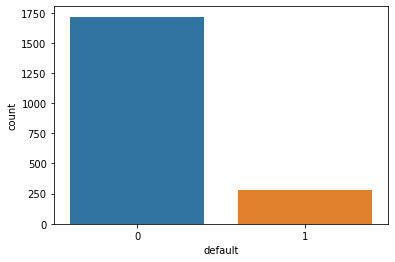

In [28]:
# Executando novamente os gráficos anteriores, porém agora com os dados corigidos
sns.countplot(x = base_credit['default']);

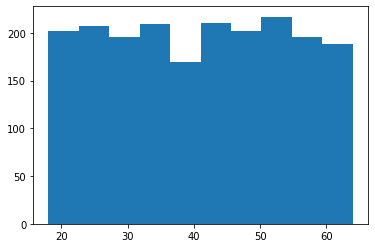

In [29]:
plt.hist(x = base_credit['age']);

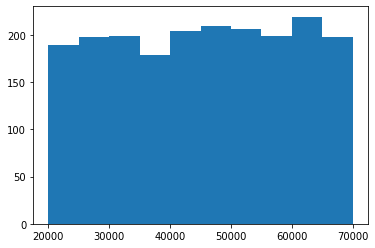

In [30]:
plt.hist(x = base_credit['income']);

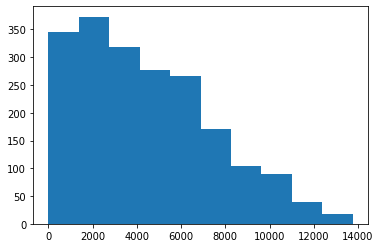

In [31]:
plt.hist(x = base_credit['loan']);

In [32]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico.show()

# Agora podemos ver os gráficos com mais precisão e clareza

# Tratamento nos valores faltantes
Iremos tratar os valores que o cliente não informaram

In [33]:
# Verificando se possui algum valor nulo
base_credit.isnull()

# Dessa forma não conseguimos ver com clareza todas as informações,
# nesse caso podemos fazer um somatório para facilitar e conseguirmos identificar

clientid  income    age   loan  default
0        False   False  False  False    False
1        False   False  False  False    False
2        False   False  False  False    False
3        False   False  False  False    False
4        False   False  False  False    False
...        ...     ...    ...    ...      ...
1995     False   False  False  False    False
1996     False   False  False  False    False
1997     False   False  False  False    False
1998     False   False  False  False    False
1999     False   False  False  False    False

[2000 rows x 5 columns]

In [34]:
base_credit.isnull().sum()

# Com isso aparece o somatório de quantas vezes aparece o (True)
# valor faltante NULO. Encontramos somente 3 valores na coluna 'age' que está faltando

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [35]:
# Agora vamos localicar esses valores na coluna
# Filtro para trazer os registros com valor NULO
base_credit.loc[pd.isnull(base_credit['age'])]

# Agora vamos preencher esses valores
# Podemos extrair a média das idades e preencher com o valor da média

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [36]:
# Preenchendo os valores faltantes automaticamente
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

# Ao executar o código ele altera os valores com a média

In [37]:
# Consultando novamente para ver se retorna os mesmos valores nulos
base_credit.loc[pd.isnull(base_credit['age'])]

# Não retornou nenhum valor porque conseguimos preencher corretamente

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [38]:
# Consultando os valores pelo ID
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)]

# Esse traço (|) significa OR

clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

In [39]:
# Usando uma consulta mais simples para retornar o mesmo resultado acima
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

# '.isin()' --> Seleciona valores que estão em determinanda posição,
# nesse caso passamos uma lista com os valores que queremos encontrar

clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

# Divisão entre previsores e classe
Objetivo: Utilizar a 'income' (Renda), 'age' (idade) e 'loan' (Dívida) que são dados históricos, para saber se a pessoa vai ou não pagar a dívida.

Precisamos fazer a divisão entre 2 variáveis.

- Uma vai armazenar os atributos previsores 'income', 'age' e 'loan'.
- A outra para armazenar a classe.

Normalmente chamamos a variável previsora de X e a variável de classe de Y.

In [40]:
# Vai selecionar linhas e colunas do dataset
# O primeiro parâmetro é quantas linhas eu irei retornar (:) --> Traz todas as linhas
# O segundo é quais colunas vou retornar (1:4) --> Traz 3 colunas
# Selecionamos apenas os previsores sem a coluna 'default'
X_credit = base_credit.iloc[:, 1:4].values

In [41]:
# Variável para armazenar os previsores
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [42]:
type(X_credit)

numpy.ndarray

In [43]:
# Agora vamos selecionar o útimo atributo coluna 'defaut'
y_credit = base_credit.iloc[:, 4].values

In [44]:
# Variável para armazenar as respostas (classes)
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
type(y_credit)

numpy.ndarray

# Escalonamento dos valores

In [46]:
# O que vamos fazer é identificar qual é o menor valor na primeira posição [0], coluna 'income'
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [47]:
# Selecionando a menor renda
# Primeiro (:) com isso indicamos que selecione todas as linhas
# Segundo (0) a localização da coluna
print(f'Menor renda: {X_credit[:, 0].min()}')
print(f'Menor idade: {X_credit[:, 1].min()}')
print(f'Menor dívida: {X_credit[:, 2].min()}')

# Retornou a menor renda de 20 mil

Menor renda: 20014.4894700497
Menor idade: 18.055188510566897
Menor dívida: 1.37762959325451


In [48]:
# Selecionando a maior renda
print(f'Maior renda: {X_credit[:, 0].max()}')
print(f'Maior idade: {X_credit[:, 1].max()}')
print(f'Maior dívida: {X_credit[:, 2].max()}')

# Retornou 69 mil
# Existe uma diferença muito grande entre esses valores
# Como esses valores estão em uma escala muito grande, é necessário fazer
# uma padronização nesses valores, se não o modelo ma ML terá dificuldade com esses dados

Maior renda: 69995.6855783239
Maior idade: 63.971795841120205
Maior dívida: 13766.0512393337


In [49]:
# Fazendo uma nova importação
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)   # Vai se encaixar nos dados e fazer a transformação

In [50]:
# Agora vamos comparar os valores mínimos novamente
print(f'Menor renda: {X_credit[:, 0].min()}')
print(f'Menor idade: {X_credit[:, 1].min()}')
print(f'Menor dívida: {X_credit[:, 2].min()}')

# Agora temos valores na mesma escala

Menor renda: -1.7676158019964077
Menor idade: -1.7264145408889917
Menor dívida: -1.4592791099462408


In [51]:
print(f'Maior renda: {X_credit[:, 0].max()}')
print(f'Maior idade: {X_credit[:, 1].max()}')
print(f'Maior dívida: {X_credit[:, 2].max()}')

# Também temos os valores máximos na mesma escala
# Com isso o modelo não irá considerar um valor mais importante que o outro

Maior renda: 1.7220222385319197
Maior idade: 1.7393673928651967
Maior dívida: 3.0616609141708273


In [52]:
X_credit

# Até mesmo os outros valores das colunas
# Percebemos que todos estão escalonáveis

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

# Base de dados do censo

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

In [53]:
# Importando arquivo 'census.csv'
base_census = pd.read_csv('/content/census.csv')

# OBJETIVO: 
Fazer uma previsão se a pessoa ganha mais ou menos que 50 mil dólares por ano.

In [54]:
# Visualizando 5 primeiras linhas
base_census.head()

# 'age' --> Variável Numérica e Discreta. Temos um valor finito e inteiro.
# 'workclass' --> Indicar qual a classe de trabalho. Variáveis Categóricas e Nominal.
# 'final-weight' --> Pontuação das pessoas. Variável Contínua.
# 'education' --> Variável Categórica e Nominal Simples.
# 'education-num' --> Número de anos de estudo. Variável Distreta e conjunto de valores finitos.
# 'marital-status' --> Variável Categórica e Nominal. Um não é mais importante que o outro.
# 'occupation' --> Variável Categórica e Nominal. Um não é mais importante que o outro.
# 'relationship	' --> Variável Categórica e Nominal. Um não é mais importante que o outro.
# 'race' --> Variável Categórica e Nominal. Um não é mais importante que o outro.
# 'sex' --> Variável Categórica e Nominal. Um não é mais importante que o outro.
# 'capital-gain' --> Quanto de dinheiro que a pessoa ganha. Variável Contínua.
# 'capital-loos' --> Quanto de dinheiro que a pessoa perde. Variável Contínua.
# 'hour-per-week' --> Variável Numérica e Discreta. Hpras trabalhadas por semana.
# 'native-country' --> Variável Categórica e Nominal.
# 'income' --> Variável Categórica e Ordinal.

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [55]:
# Visualizando dados estatísticos
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [56]:
# Filtrando valores nulos
base_census.isnull().sum()

# Como não possui valores nulos não precisamos fazer nenhum tratamento

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

# Visualização dos dados

In [57]:
# Contagem de quantos registros temos em cada classe
# Existe dois valores (<=50k e >50k)
# E existe 24720 que ganham <=50k e 7841 que ganham >50k
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

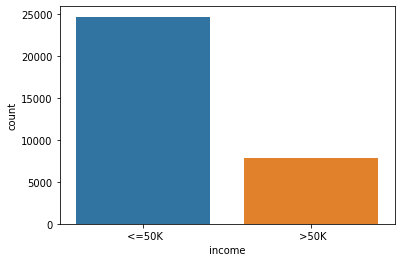

In [58]:
# Visualizando as informações acima em um gráfico
sns.countplot(x = base_census['income']);

# Temos uma quantidade maior que ganham <=50k
# Está desbalanceada

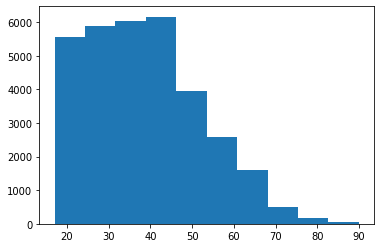

In [59]:
# Histograma para verificar a distribuição dos dados
# Coluna 'age'
plt.hist(base_census['age']);

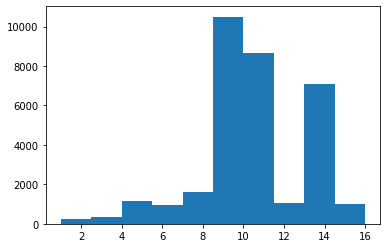

In [60]:
# Histograma para coluna 'education-num'
plt.hist(base_census['education-num']);

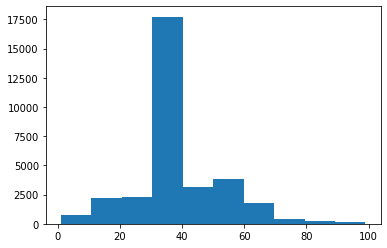

In [61]:
# Histograma da coluna 'hour-per-week'
plt.hist(base_census['hour-per-week']);

In [62]:
# Geração de gráficos dinâmicos
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

In [63]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

In [64]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [65]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'relationship'])
grafico.show()

In [66]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

# Divisão entre Previsores e Classe

In [67]:
# Mostrando as colunas
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [68]:
# Variável dos previsores
X_census = base_census.iloc[:, 0:14].values

# Selecionamos [0:14] para pegar da primeira coluna até a 13°
# A última não porque ela será a variável Classe

In [69]:
# Visualizando resultado
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [70]:
# Variável de Classe
y_census = base_census.iloc[:, 14].values

# Irá selecionar apenas a última coluna

In [71]:
# Observando valores
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# Tratamento de atributos categóricos


### LabelEncoder

In [72]:
# Importando biblioteca
from sklearn.preprocessing import LabelEncoder

In [73]:
label_encoder_teste = LabelEncoder()

In [74]:
X_census[:, 1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [75]:
# Converter String para Número
teste = label_encoder_teste.fit_transform(X_census[:, 1])

In [76]:
# Visualizando resultado
teste

array([7, 6, 4, ..., 4, 4, 5])

In [77]:
# Visualizando Valores na tabela
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [78]:
# Temos que fazer a transformação para cada atribuito (coluna)
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [79]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:, 6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:, 13])

In [80]:
# Visualizando todos os atributos
X_census

# Agora a base de dados está mais fácil de trabalhar, mas ainda falta alguns ajustes

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

# OneHotEncoder
O único problema de utilizar somente o LabelEncoder é que podemos ter várias categorias e valores diferentes.

**Exemplo:** Se tivermos 15 categorias, a categoria 11 tem índice 0 ou índice 1, enquanto a categoria 15 terá o índice 15.

Pelo fato dos algorítmos trabalharem com diversas operações matemáticas isso indica que o algorítmo pode determinar o índice 0 melhor que 1 ou o 15 melhor que o 0.

**Por isso temos o OneHotEncoder, para que isso não aconteça, dessa forma ao invés de termos apenas uma coluna no dataset podemos criar mais de acordo com a quantidade de atributos**

In [81]:
# Vamos contar os atributos
np.unique(base_census['workclass'])

# Nesse caso criamos 9 colunas porque possui 9 atributos

# Ficaria dessa forma:
# 1 0 0 0 0 0 0 0 0
# 0 1 0 0 0 0 0 0 0
# 0 0 1 0 0 0 0 0 0
# 0 0 0 1 0 0 0 0 0
# 0 0 0 0 1 0 0 0 0
# 0 0 0 0 0 1 0 0 0
# 0 0 0 0 0 0 1 0 0
# 0 0 0 0 0 0 0 1 0
# 0 0 0 0 0 0 0 0 1

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [82]:
# Agora verificando na coluna 'occupation'
np.unique(base_census['occupation'])

# Nesse casso adicionaremos 15 colunas na base de dados

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [83]:
# Importando biblioteca
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [84]:
# Criando uma variável
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), 
                                                        [1, 3, 5, 6, 7, 8, 9, 13])],
                                         remainder='passthrough')   # Não apaga os  outro atributos, se não colocar ele apaga todos os atributos

# Colocamos todos os parêmetro que transformamos de String para Numérico

In [85]:
# Recriamos a base de dados Census
X_census = onehotencoder_census.fit_transform(X_census).toarray()

# .toarray() --> Fazemos a conversão para o numpy array

In [86]:
# Observando a variável X_census
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [87]:
# Visualizando na posição ZERO
X_census[0]

# Todos esses dados indica todas as informações de apenas um cliente da base de dados
# Aumentamos para 108 colunas

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [88]:
# Mostrando linhas e colunas
print(f'Linhas: {X_census.shape[0]}')
print(f'Colunas: {X_census.shape[1]}')

Linhas: 32561
Colunas: 108


# Escalonamento dos valores

In [89]:
# Importando biblioteca
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [90]:
# Checando os valores
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# Divisão das bases em Treinamento e Teste
Vamos executar esse processo nas duas base de dados Credit Data e Census.

In [91]:
# Importando biblioteca
from sklearn.model_selection import train_test_split

# Credit Data

In [92]:
# Criando variáveis para análise
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(
    X_credit, y_credit, test_size = 0.25, random_state = 0)

# X_credit --> Parâmetro definidos
# y_credit --> Classe definida
# test_size = 0.25 --> Tamanho da base de dados teste
# random_state = 0 --> Se não colocar, toda vez que executar esse código retornaram valores diferentes

In [93]:
# Observando a variável treinamento
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [94]:
# Observando a variável teste
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

# Census

In [95]:
# Criando variáveis para análise
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(
    X_census, y_census, test_size = 0.15, random_state = 0)

In [96]:
# Observando a variável treinamento
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [97]:
# Observando variável teste
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

# Salvando as variável

In [98]:
# Importando biblioteca
import pickle   # Salva variáveis em disco

In [99]:
# SALVANDO ARQUIVO  CREDIT

# 'credit.pkl' --> Nome do arquivo a ser salvo (pkl) é a extensão para salvar o arquivo
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

# Colocamos em formato de lista as variáveis que queremos salvar

In [100]:
# SALVANDO ARQUIVO CENSUS

with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

# Naive Bayes

In [101]:
# Distribuição estatística
from sklearn.naive_bayes import GaussianNB

# Base: Risco de Crédito

In [102]:
# Carregando essa base de dados apenas para usar o Naive Bayes e entendermos como 
# funciona, para depois usar nas outras bases de dados
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [103]:
base_risco_credito

# OBJETIVO:  Fazer a previsão do risco de conseder empréstimo para um cliente

# Para fazer o pré-processamento, temos que dividir as variáveis
# X vai armazenar os previsores
# Y vai armazenar a clase

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [104]:
# Criando a variável que irá armazenar os previsores
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

# Temos esse atributos categóricos tipo String e precisamos fazer
# a conversão para atributos numéricos

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [105]:
# Variável que vai armazenar a classe
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [106]:
# Importando biblioteca
from sklearn.preprocessing import LabelBinarizer
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [107]:
# Aplicando os processamentos
X_risco_credito[:, 0] = label_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_encoder_garantia.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_encoder_renda.fit_transform(X_risco_credito[:, 3])

In [108]:
X_risco_credito

# Agora podemos ver que todos os textos foram transformados em números

#####################################################################################################

# INFORMAÇÕES DOS VALORES CONVERTIDOS

# HISTÓRIA
# [ Boa --> 0 ]
# [ Desconhecida --> 1 ]
# [ Ruim --> 2 ]

# DÍVIDA
# [ Alta --> 0 ]
# [ Baixa --> 1 ]

# GARANTIAS
# [ Adequada --> 0 ]
# [ Nenhuma --> 1 ]

# RENDA
# [ Menor que 15 --> 0 ]
# [ Entre 15 e 35 --> 1 ]
# [ Maior que 35 --> 2 ]

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [109]:
# Salvando esse arquivo que foi transformado para não precisar tratar de novo
import pickle

with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [110]:
# Treinando o modelo
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [111]:
# Agora que o algorítmo está treinado, vamos fazer uma previsão
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])   # Esses números estão abaixo

# História boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# História ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)

In [112]:
# Observando os valores
previsao

# O primeiro retornou que o risco de conseder um empréstimo é baixo
# O segundo retornou que o risco de conseder um empréstimo é moderado

array(['baixo', 'moderado'], dtype='<U8')

In [113]:
# Mostrando as classes 
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [115]:
# Contando quantos atributos temos por classe
naive_risco_credito.class_count_

# 6 --> Classe Alta
# 5 --> Classe Baixa
# 3 --> Classe Moderada

array([6., 5., 3.])

In [116]:
# Probabilidades Apriore
naive_risco_credito.class_prior_

# Os registros que considerados Alto que possuem 6 representa 0.4285 (42%) da base de dados
# Os registros que considerados Baixo que possuem 5 representa 0.3571 (35%) da base de dados
# Os registros que considerados Moderado que possuem 6 representa 0.2142 (21%) da base de dados

array([0.42857143, 0.35714286, 0.21428571])

# Base: Credit Data

In [117]:
# Verificando as variáveis previsoras e de classe
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [118]:
# Verificando outras variáveis
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [119]:
# Treinando o modelo
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)   # Primeiro passamos os previsores e depois a classe

GaussianNB()

In [120]:
# Fazendo as previsões
previsoes = naive_credit_data.predict(X_credit_teste)

# Passamos então os dados de teste para então fazer as predições do nosso modelo

In [121]:
# Observando o resultado
previsoes

# 1 --> Não paga o empréstimo
# 0 --> Paga o empréstimo
# O primeiro paga, o segundo não paga e assim por diante

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,